In [1]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import random

In [2]:
from utils import helper_functions as hf
import change_detection as cd
import Config as Config

In [3]:
files_in_anomaly_directory = os.listdir(Config.ANOMALY_VIDEO_DIRECTORY)
anomaly_video_file = random.choice(files_in_anomaly_directory)
anomaly_video_file_path = os.path.join(Config.ANOMALY_VIDEO_DIRECTORY, anomaly_video_file)

In [4]:
anomaly_video_file_path

'./videos/Anomaly Videos/Arson002_x264.mp4'

In [5]:
model = tf.keras.models.load_model(Config.FINE_TUNED_LSTM_AUTO_ENCODER_PATH)

2023-08-10 23:33:35.769691: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9798 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 2080 Ti, pci bus id: 0000:01:00.0, compute capability: 7.5


In [6]:
#Extracting all the frames
video_frames_dict = hf.get_frames_from_video(anomaly_video_file_path)

In [7]:
len(video_frames_dict)

4439

In [8]:
frames_in_batches = hf.get_frames_in_batches(30, video_frames_dict)

In [9]:
frame_sequence_tracker = hf.get_frame_sequence_tracker(frames_in_batches)

In [48]:
frame_sequence_tracker[1].shape

(30, 256, 256, 1)

In [ ]:
significant_keys = cd.perform_change_detection(frame_sequence_tracker)

In [12]:
significant_keys

[36,
 44,
 96,
 97,
 98,
 99,
 100,
 102,
 106,
 107,
 109,
 111,
 112,
 115,
 118,
 120,
 128,
 130,
 134,
 135,
 139,
 141,
 142,
 145]

In [17]:
keys_to_consider = []
cost_tracker = {}
for key in significant_keys:
    significant_sequence = frame_sequence_tracker[key]
    reshaped_sequences = significant_sequence.reshape(3, 10, 256, 256, 1)
    for index, single_sequence in enumerate(reshaped_sequences):
        single_sequence = np.expand_dims(single_sequence, axis=0)
        reconstructed_sequence = model.predict(single_sequence)  
        
        # Calculating reconstruction cost for the single sequence
        cost = np.linalg.norm(single_sequence - reconstructed_sequence[0])
        cost_tracker[f'{key}_{index}'] = cost


1/1 [==============================] - 0s 27ms/step


In [21]:
len(cost_tracker)

72

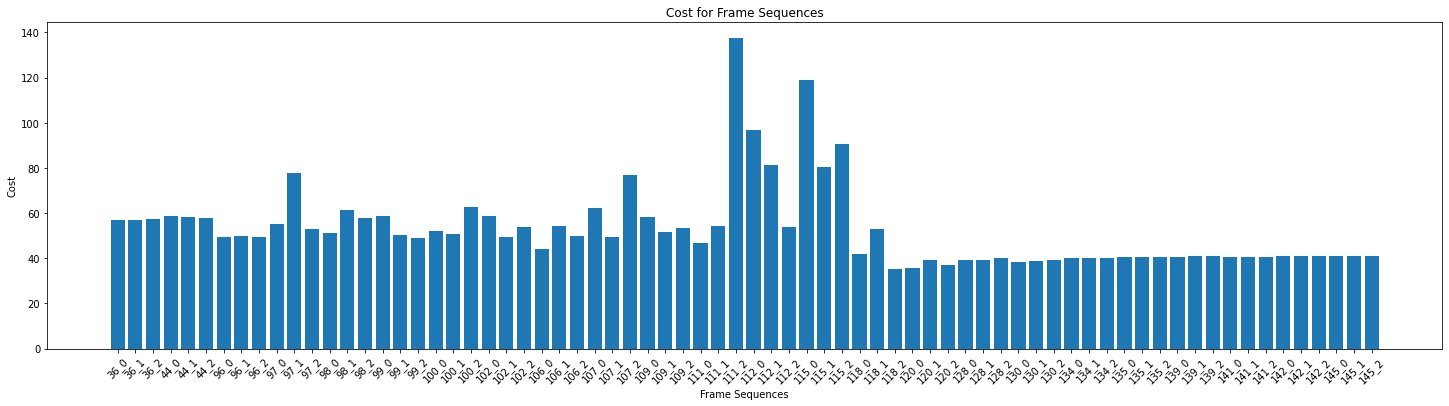

In [32]:
keys = list(cost_tracker.keys())
values = list(cost_tracker.values())

# Plotting
plt.figure(figsize=(25, 6))
plt.bar(keys, values)
plt.xlabel('Frame Sequences')
plt.ylabel('Cost')
plt.title('Cost for Frame Sequences')
plt.xticks(rotation=45)  # Rotating x-axis labels for visibility
# plt.tight_layout()
plt.show()

In [70]:
start, end = hf.get_original_frame_numbers(111,30)

In [72]:
start = start - 1

In [73]:
start, end

(3301, 3330)

3301


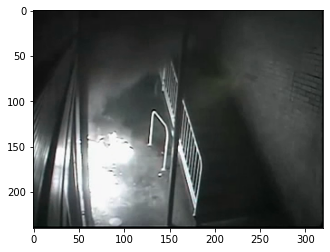

3302


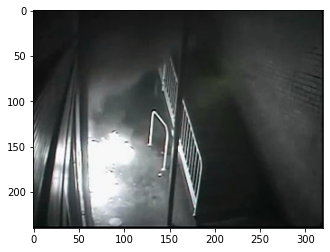

3303


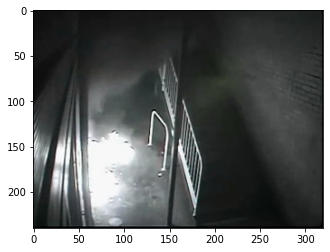

3304


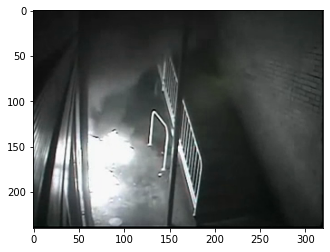

3305


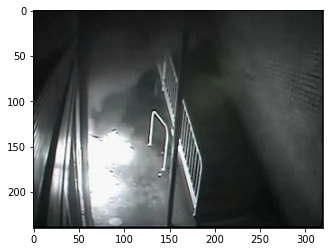

3306


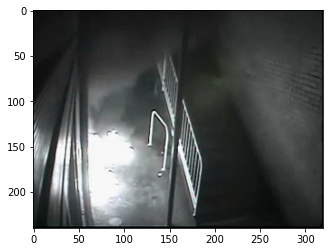

3307


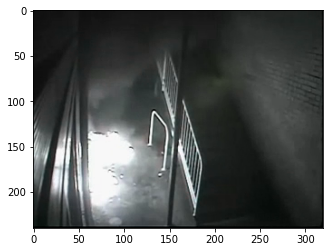

3308


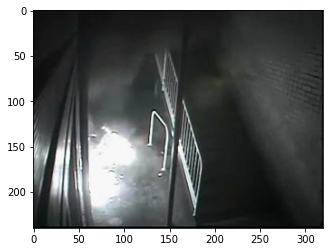

3309


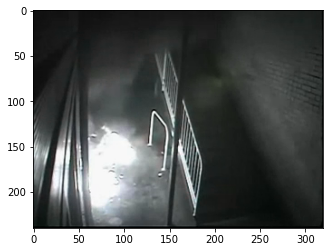

3310


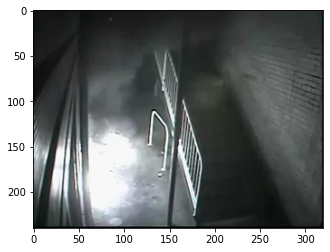

3311


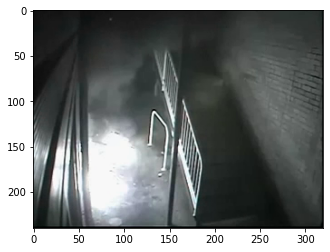

3312


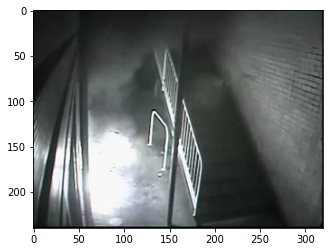

3313


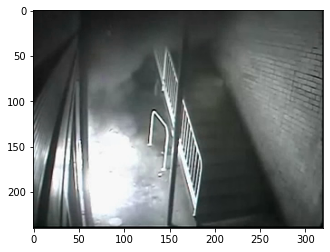

3314


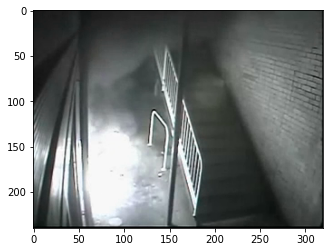

3315


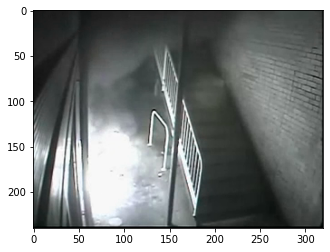

3316


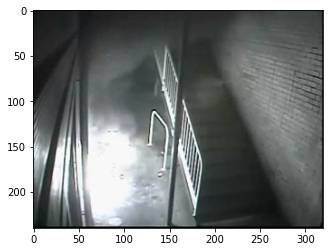

3317


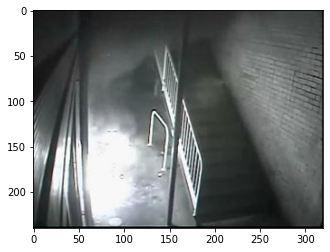

3318


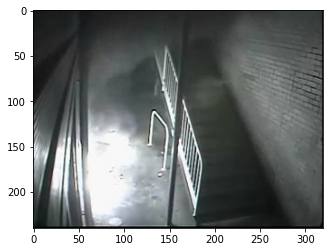

3319


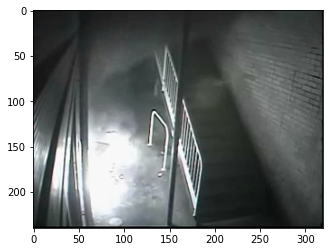

3320


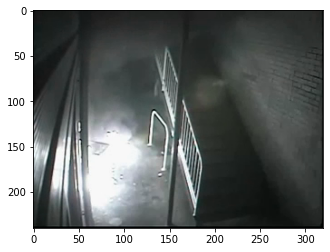

3321


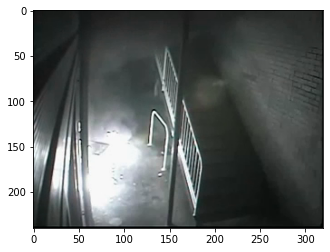

3322


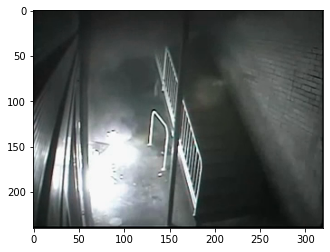

3323


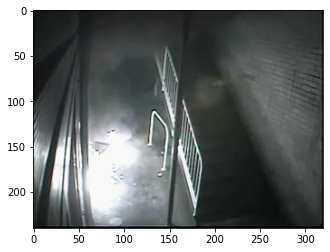

3324


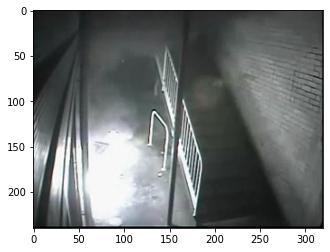

3325


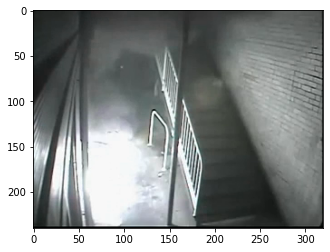

3326


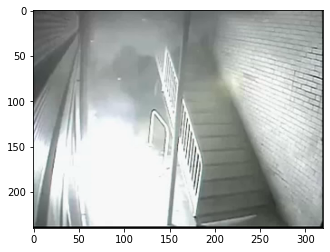

3327


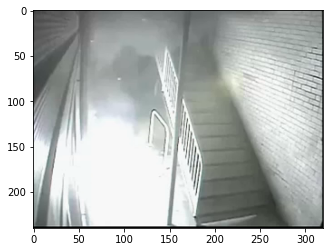

3328


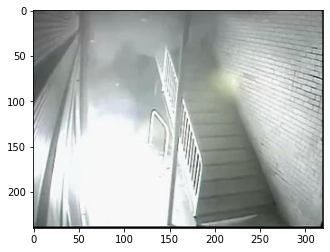

3329


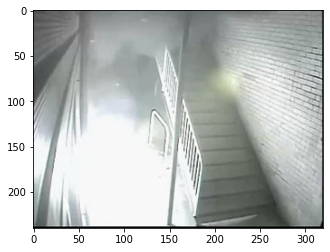

3330


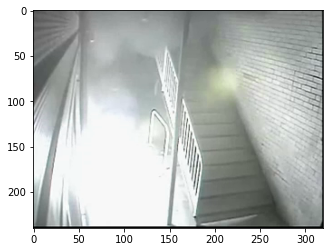

In [76]:
count = 0
for i in range(start, end + 1):
    print(i)
    original_frame = video_frames_dict[i]
    hf.display_image(original_frame)
